In [123]:
from pathlib import Path
import pandas as pd
from tqdm.notebook import tqdm 
from datetime import  datetime, timedelta
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, MonthLocator

In [124]:
# Set the directory
#Run this first for OPI cleaning
# OPI CLEANING AND AVERAGING
#path = Path('U:') / 'Opi system file' / 'SQL database'/ 'New Data Processing'
path = Path('W:') / 'Amber Ag' / 'ASABE 2022'/'OPI_raw'

In [125]:
#df = pd.read_csv (path / 'Bin16mod.csv')

# Original file name
filename = path / 'Pherc raw 22Nov2021.xls'
df = pd.read_excel(filename, sheet_name = '_B16')
#df = pd.read_excel(filename)

df
#xls = pd.ExcelFile ('W:/Amber Ag/Amber clean data/Bin 13 review/Measured_CO2_bin13.xlsx')
#mf = pd.read_excel(xls, sheet_name = 'Sheet1')
#mf

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


,OPI_DATE,CABLE_MAX,CABLE_MIN,CABLE_AVG,CABLE_LEVEL,BIN_MAX,BIN_MIN,BIN_SPREAD,BIN_AVG,BIN_MC_MAX,...,RH1,RH2,RH3,RH4,RH5,MC1,MC2,MC3,MC4,MC5
0,2020-10-28 15:23:52.000000,68.40\t-100.00\t-100.00\t-100.00\t-100.00\r\n,60.30\t-100.00\t-100.00\t-100.00\t-100.00\r\n,65.07\t-100.00\t-100.00\t-100.00\t-100.00\r\n,NaN,68.400002,60.299999,8.1,65.070000,8.10,...,40.90\t41.80\t42.80\t44.80\t45.20\t46.40\t48.2...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,NaN\tNaN\tNaN\tNaN\tNaN\tNaN\tNaN\tNaN\tNaN\r\n,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...
1,2020-10-28 16:08:00.000000,59.50\t59.10\t59.20\t59.30\t59.10\r\n,55.70\t56.10\t56.00\t56.20\t56.00\r\n,57.96\t57.71\t57.55\t57.91\t57.59\r\n,NaN,59.500000,55.700001,3.8,57.750000,3.80,...,52.40\t52.60\t53.00\t54.40\t54.80\t56.00\t57.5...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,NaN\tNaN\tNaN\tNaN\tNaN\tNaN\tNaN\tNaN\tNaN\r\n,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...
2,2020-10-28 17:08:00.000000,53.70\t53.20\t53.30\t53.30\t52.90\r\n,52.00\t52.30\t52.00\t52.00\t52.00\r\n,53.08\t52.72\t52.61\t52.66\t52.54\r\n,-99.90\t-99.90\t-99.90\t-99.90\t-99.90\r\n,53.700001,52.000000,1.7,52.730000,1.70,...,62.50\t62.50\t62.60\t63.70\t63.80\t65.00\t65.7...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,NaN\tNaN\tNaN\tNaN\tNaN\tNaN\tNaN\tNaN\tNaN\r\n,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...
3,2020-10-28 17:11:20.000000,53.40\t52.90\t52.90\t52.90\t52.70\r\n,51.70\t52.00\t51.80\t51.80\t51.80\r\n,52.79\t52.45\t52.36\t52.40\t52.26\r\n,-99.90\t-99.90\t-99.90\t-99.90\t-99.90\r\n,53.400002,51.700001,1.7,52.459999,1.70,...,63.00\t62.80\t62.80\t64.50\t64.20\t65.50\t66.2...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,NaN\tNaN\tNaN\tNaN\tNaN\tNaN\tNaN\tNaN\tNaN\r\n,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...
4,2020-10-28 19:25:50.000000,45.60\t-100.00\t-100.00\t-100.00\t-100.00\r\n,44.40\t-100.00\t-100.00\t-100.00\t-100.00\r\n,45.03\t-100.00\t-100.00\t-100.00\t-100.00\r\n,NaN,45.599998,44.400002,1.2,45.029999,1.20,...,87.20\t86.80\t86.60\t87.30\t86.50\t87.50\t87.8...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,NaN\tNaN\tNaN\tNaN\tNaN\tNaN\tNaN\tNaN\tNaN\r\n,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8389,2021-11-22 06:55:00.000000,39.50\t41.50\t40.00\t44.20\t-99.90\r\n,24.50\t24.40\t24.10\t24.20\t-99.90\r\n,32.52\t34.04\t34.30\t37.01\t-99.90\r\n,NaN,44.200001,37.000000,7.2,39.470001,15.03,...,84.00\t

In [4]:
# Load file into Pandas data frame
#df = pd.read_excel(filename)
#df


In [126]:
def clean_time(x):
    # Remove unnecesary charactor
    timestamp_text = x[:16]
    # Convert to Python datetime variable
    timestamp = datetime.strptime(timestamp_text, '%Y-%m-%d %H:%M')
    return timestamp

In [127]:
df['OPI_DATE'] = df['OPI_DATE'].apply(lambda x: clean_time(x))

In [128]:
df['C1'] = df['C1'].apply(lambda x: x.split('\t'))
df['C2'] = df['C2'].apply(lambda x: x.split('\t'))
df['C3'] = df['C3'].apply(lambda x: x.split('\t'))
df['C4'] = df['C4'].apply(lambda x: x.split('\t'))
df['C5'] = df['C5'].apply(lambda x: x.split('\t'))

In [129]:
df

,OPI_DATE,CABLE_MAX,CABLE_MIN,CABLE_AVG,CABLE_LEVEL,BIN_MAX,BIN_MIN,BIN_SPREAD,BIN_AVG,BIN_MC_MAX,...,RH1,RH2,RH3,RH4,RH5,MC1,MC2,MC3,MC4,MC5
0,2020-10-28 15:23:00,68.40\t-100.00\t-100.00\t-100.00\t-100.00\r\n,60.30\t-100.00\t-100.00\t-100.00\t-100.00\r\n,65.07\t-100.00\t-100.00\t-100.00\t-100.00\r\n,NaN,68.400002,60.299999,8.1,65.070000,8.10,...,40.90\t41.80\t42.80\t44.80\t45.20\t46.40\t48.2...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,NaN\tNaN\tNaN\tNaN\tNaN\tNaN\tNaN\tNaN\tNaN\r\n,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...
1,2020-10-28 16:08:00,59.50\t59.10\t59.20\t59.30\t59.10\r\n,55.70\t56.10\t56.00\t56.20\t56.00\r\n,57.96\t57.71\t57.55\t57.91\t57.59\r\n,NaN,59.500000,55.700001,3.8,57.750000,3.80,...,52.40\t52.60\t53.00\t54.40\t54.80\t56.00\t57.5...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,NaN\tNaN\tNaN\tNaN\tNaN\tNaN\tNaN\tNaN\tNaN\r\n,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...
2,2020-10-28 17:08:00,53.70\t53.20\t53.30\t53.30\t52.90\r\n,52.00\t52.30\t52.00\t52.00\t52.00\r\n,53.08\t52.72\t52.61\t52.66\t52.54\r\n,-99.90\t-99.90\t-99.90\t-99.90\t-99.90\r\n,53.700001,52.000000,1.7,52.730000,1.70,...,62.50\t62.50\t62.60\t63.70\t63.80\t65.00\t65.7...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,NaN\tNaN\tNaN\tNaN\tNaN\tNaN\tNaN\tNaN\tNaN\r\n,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...
3,2020-10-28 17:11:00,53.40\t52.90\t52.90\t52.90\t52.70\r\n,51.70\t52.00\t51.80\t51.80\t51.80\r\n,52.79\t52.45\t52.36\t52.40\t52.26\r\n,-99.90\t-99.90\t-99.90\t-99.90\t-99.90\r\n,53.400002,51.700001,1.7,52.459999,1.70,...,63.00\t62.80\t62.80\t64.50\t64.20\t65.50\t66.2...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,NaN\tNaN\tNaN\tNaN\tNaN\tNaN\tNaN\tNaN\tNaN\r\n,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...
4,2020-10-28 19:25:00,45.60\t-100.00\t-100.00\t-100.00\t-100.00\r\n,44.40\t-100.00\t-100.00\t-100.00\t-100.00\r\n,45.03\t-100.00\t-100.00\t-100.00\t-100.00\r\n,NaN,45.599998,44.400002,1.2,45.029999,1.20,...,87.20\t86.80\t86.60\t87.30\t86.50\t87.50\t87.8...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,NaN\tNaN\tNaN\tNaN\tNaN\tNaN\tNaN\tNaN\tNaN\r\n,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8389,2021-11-22 06:55:00,39.50\t41.50\t40.00\t44.20\t-99.90\r\n,24.50\t24.40\t24.10\t24.20\t-99.90\r\n,32.52\t34.04\t34.30\t37.01\t-99.90\r\n,NaN,44.200001,37.000000,7.2,39.470001,15.03,...,84.00\t83.00\t82.20\t80.20\t67.30\t65.70\t65.7...

In [134]:
# def average_first5(xs):
#     total = 0
#     count = 0
# #     for x in xs[:3]:     for first 3 sensors
#     for x in xs[:5]:
#         if x != 'NaN' and float(x) > -32:
#             total += float(x)
#             count += 1
#     if count > 0:
#         return  total / count
#     else:
#         return np.nan

In [130]:
#USE THIS CODE FOR SENSOR 6,7,8,9 AVERAGE

def average_first6_9(xs):
    total = 0
    count = 0
    for x in xs[5:9]:
        if x != 'NaN' and float(x) > -32:
            total += float(x)
            count += 1
    if count > 0:
        return  total / count
    else:
        return np.nan

In [131]:
clean_df = df[['OPI_DATE']].copy()
clean_df

,OPI_DATE
0,2020-10-28 15:23:00
1,2020-10-28 16:08:00
2,2020-10-28 17:08:00
3,2020-10-28 17:11:00
4,2020-10-28 19:25:00
...,...
8389,2021-11-22 06:55:00
8390,2021-11-22 07:55:00
8391,2021-11-22 08:55:00
8392,2021-11-22 09:55:00


In [132]:
clean_df['C1s-avg'] = df['C1'].apply(lambda x: average_first6_9(x)) 
clean_df['C2s-avg'] = df['C2'].apply(lambda x: average_first6_9(x)) 
clean_df['C3s-avg'] = df['C3'].apply(lambda x: average_first6_9(x)) 
clean_df['C4s-avg'] = df['C4'].apply(lambda x: average_first6_9(x)) 
clean_df['C5s-avg'] = df['C5'].apply(lambda x: average_first6_9(x)) 

In [133]:
df['RH1'] = df['RH1'].apply(lambda x: x.split('\t'))
# df['RH2'] = df['RH2'].apply(lambda x: x.split('\t'))
# df['RH3'] = df['RH3'].apply(lambda x: x.split('\t'))
# df['RH4'] = df['RH4'].apply(lambda x: x.split('\t'))
# df['RH5'] = df['RH5'].apply(lambda x: x.split('\t'))

In [134]:
clean_df['RH1s-avg'] = df['RH1'].apply(lambda x: average_first6_9(x)) 
# clean_df['RH2s-avg'] = df['RH2'].apply(lambda x: average_first5(x)) 
# clean_df['RH3s-avg'] = df['RH3'].apply(lambda x: average_first5(x)) 
# clean_df['RH4s-avg'] = df['RH4'].apply(lambda x: average_first5(x)) 
# clean_df['RH5s-avg'] = df['RH5'].apply(lambda x: average_first5(x)) 

In [135]:
df['MC1'] = df['MC1'].apply(lambda x: x.split('\t'))
#df['MC2'] = df['MC2'].apply(lambda x: x.split('\t'))
#df['MC3'] = df['MC3'].apply(lambda x: x.split('\t'))
#df['MC4'] = df['MC4'].apply(lambda x: x.split('\t'))
#df['MC5'] = df['MC5'].apply(lambda x: x.split('\t'))

In [136]:
clean_df['MC1s-avg'] = df['MC1'].apply(lambda x: average_first6_9(x)) 
#clean_df['MC2s-avg'] = df['MC2'].apply(lambda x: average_first5(x)) 
# clean_df['MC3s-avg'] = df['MC3'].apply(lambda x: average_first5(x)) 
# clean_df['MC4s-avg'] = df['MC4'].apply(lambda x: average_first5(x)) 
# clean_df['MC5s-avg'] = df['MC5'].apply(lambda x: average_first5(x)) 

In [137]:
clean_df_excel = clean_df.copy()
clean_df_excel['OPI_DATE'] = clean_df_excel['OPI_DATE'].apply(lambda x: datetime.strftime(x, '%m/%d/%Y %I:%M %p'))
#save to excel
clean_df_excel.to_excel(path / 'Each-cable_hourly_raw_b14.xls', index=False)
clean_df

,OPI_DATE,C1s-avg,C2s-avg,C3s-avg,C4s-avg,C5s-avg,RH1s-avg,MC1s-avg
0,2020-10-28 15:23:00,62.750,NaN,NaN,NaN,NaN,48.525,NaN
1,2020-10-28 16:08:00,57.000,56.633333,56.433333,56.866667,56.433333,57.150,NaN
2,2020-10-28 17:08:00,52.750,52.466667,52.266667,52.333333,52.200000,64.750,NaN
3,2020-10-28 17:11:00,52.500,52.200000,52.033333,52.100000,51.900000,65.375,NaN
4,2020-10-28 19:25:00,45.075,NaN,NaN,NaN,NaN,87.375,NaN
...,...,...,...,...,...,...,...,...
8389,2021-11-22 06:55:00,38.200,38.800000,38.433333,42.066667,NaN,67.275,14.5725
8390,2021-11-22 07:55:00,38.200,38.900000,37.766667,41.433333,NaN,67.275,14.5700
8391,2021-11-22 08:55:00,38.250,38.933333,37.333333,40.866667,NaN,67.300,14.5725
8392,2021-11-22 09:55:00,38.350,39.066667,36.900000,40.366667,NaN,67.475,14.5975


In [138]:
clean_df = clean_df[clean_df['OPI_DATE'] > datetime(year=2020, month=11, day=3)]
#clean_df = clean_df[clean_df['OPI_DATE'] > datetime(year=2021, month=11, day=30)]
#this indicates the start date
clean_df

,OPI_DATE,C1s-avg,C2s-avg,C3s-avg,C4s-avg,C5s-avg,RH1s-avg,MC1s-avg
126,2020-11-03 00:51:00,38.650,38.600000,38.600000,38.633333,38.866667,51.350,NaN
127,2020-11-03 01:51:00,38.700,38.600000,38.733333,38.533333,38.933333,53.025,NaN
128,2020-11-03 02:51:00,38.325,38.266667,38.300000,38.266667,38.533333,56.250,NaN
129,2020-11-03 03:51:00,37.200,37.066667,37.166667,37.133333,37.433333,60.525,NaN
130,2020-11-03 04:51:00,35.675,35.566667,35.633333,35.533333,36.000000,64.675,NaN
...,...,...,...,...,...,...,...,...
8389,2021-11-22 06:55:00,38.200,38.800000,38.433333,42.066667,NaN,67.275,14.5725
8390,2021-11-22 07:55:00,38.200,38.900000,37.766667,41.433333,NaN,67.275,14.5700
8391,2021-11-22 08:55:00,38.250,38.933333,37.333333,40.866667,NaN,67.300,14.5725
8392,2021-11-22 09:55:00,38.350,39.066667,36.900000,40.366667,NaN,67.475,14.5975


In [139]:
# average of first 5 sensors
c1 = clean_df[['OPI_DATE', 'C1s-avg']].copy()
c1 = c1.dropna()
c1

,OPI_DATE,C1s-avg
126,2020-11-03 00:51:00,38.650
127,2020-11-03 01:51:00,38.700
128,2020-11-03 02:51:00,38.325
129,2020-11-03 03:51:00,37.200
130,2020-11-03 04:51:00,35.675
...,...,...
8389,2021-11-22 06:55:00,38.200
8390,2021-11-22 07:55:00,38.200
8391,2021-11-22 08:55:00,38.250
8392,2021-11-22 09:55:00,38.350


In [140]:
# average of first 5 sensors
c2 = clean_df[['OPI_DATE', 'C2s-avg']].copy()
c2 = c2.dropna()
c2

,OPI_DATE,C2s-avg
126,2020-11-03 00:51:00,38.600000
127,2020-11-03 01:51:00,38.600000
128,2020-11-03 02:51:00,38.266667
129,2020-11-03 03:51:00,37.066667
130,2020-11-03 04:51:00,35.566667
...,...,...
8389,2021-11-22 06:55:00,38.800000
8390,2021-11-22 07:55:00,38.900000
8391,2021-11-22 08:55:00,38.933333
8392,2021-11-22 09:55:00,39.066667


In [141]:
# average of first 5 sensors
c3 = clean_df[['OPI_DATE', 'C3s-avg']].copy()
c3 = c3.dropna()
c3

,OPI_DATE,C3s-avg
126,2020-11-03 00:51:00,38.600000
127,2020-11-03 01:51:00,38.733333
128,2020-11-03 02:51:00,38.300000
129,2020-11-03 03:51:00,37.166667
130,2020-11-03 04:51:00,35.633333
...,...,...
8389,2021-11-22 06:55:00,38.433333
8390,2021-11-22 07:55:00,37.766667
8391,2021-11-22 08:55:00,37.333333
8392,2021-11-22 09:55:00,36.900000


In [143]:
# average of first 5 sensors
c4 = clean_df[['OPI_DATE', 'C4s-avg']].copy()
c4 = c4.dropna()
c4

,OPI_DATE,C4s-avg
126,2020-11-03 00:51:00,38.633333
127,2020-11-03 01:51:00,38.533333
128,2020-11-03 02:51:00,38.266667
129,2020-11-03 03:51:00,37.133333
130,2020-11-03 04:51:00,35.533333
...,...,...
8389,2021-11-22 06:55:00,42.066667
8390,2021-11-22 07:55:00,41.433333
8391,2021-11-22 08:55:00,40.866667
8392,2021-11-22 09:55:00,40.366667


In [144]:
# average of first 5 sensors
c5 = clean_df[['OPI_DATE', 'C5s-avg']].copy()
c5 = c5.dropna()
c5 

,OPI_DATE,C5s-avg
126,2020-11-03 00:51:00,38.866667
127,2020-11-03 01:51:00,38.933333
128,2020-11-03 02:51:00,38.533333
129,2020-11-03 03:51:00,37.433333
130,2020-11-03 04:51:00,36.000000
...,...,...
7563,2021-10-09 13:02:00,72.400000
7568,2021-10-09 18:02:00,72.666667
7569,2021-10-09 19:02:00,72.666667
7584,2021-10-10 10:02:00,74.700000


In [145]:
current_time = c1.loc[c1.index[0]]['OPI_DATE']
for index, row in c1.iterrows():
#   timestamp = datetime.datetime.strptime(row.OPI_DATE, '%m/%d/%Y %I:%M:%S %p')
    timestamp = row['OPI_DATE']
    if (timestamp - current_time) > timedelta(minutes=59) or index == c1.index[0]:
        current_time = timestamp
    else:
        c1 = c1.drop(index)



In [146]:
c1

,OPI_DATE,C1s-avg
126,2020-11-03 00:51:00,38.650
127,2020-11-03 01:51:00,38.700
128,2020-11-03 02:51:00,38.325
129,2020-11-03 03:51:00,37.200
130,2020-11-03 04:51:00,35.675
...,...,...
8389,2021-11-22 06:55:00,38.200
8390,2021-11-22 07:55:00,38.200
8391,2021-11-22 08:55:00,38.250
8392,2021-11-22 09:55:00,38.350


In [147]:

temp = c1.copy()
temp
temp.index[0]
c1.loc[temp.index[0]]['OPI_DATE']

Timestamp('2020-11-03 00:51:00')

In [148]:
# create dataframe to save
# create new df
to_be_save_df = c1[['OPI_DATE']].copy()
# add new coloum
to_be_save_df['OPI_DATE'] = to_be_save_df['OPI_DATE'].apply(lambda x: datetime.strftime(x, '%m/%d/%Y %I:%M %p'))
to_be_save_df['C1_Avg_5_sensors'] = c1[['C1s-avg']].copy()
to_be_save_df['C2_Avg_5_sensors'] = c2[['C2s-avg']].copy()
to_be_save_df['C3_Avg_5_sensors'] = c3[['C3s-avg']].copy()
to_be_save_df['C4_Avg_5_sensors'] = c4[['C4s-avg']].copy()
to_be_save_df['C5_Avg_5_sensors'] = c5[['C5s-avg']].copy()
to_be_save_df
# saving the 5 avg sensors (hourly)
to_be_save_df.to_csv(path / 'Avg_hourly_grain_temps_6-9sensors_b15.csv')
to_be_save_df

,OPI_DATE,C1_Avg_5_sensors,C2_Avg_5_sensors,C3_Avg_5_sensors,C4_Avg_5_sensors,C5_Avg_5_sensors
126,11/03/2020 12:51 AM,38.650,38.600000,38.600000,38.633333,38.866667
127,11/03/2020 01:51 AM,38.700,38.600000,38.733333,38.533333,38.933333
128,11/03/2020 02:51 AM,38.325,38.266667,38.300000,38.266667,38.533333
129,11/03/2020 03:51 AM,37.200,37.066667,37.166667,37.133333,37.433333
130,11/03/2020 04:51 AM,35.675,35.566667,35.633333,35.533333,36.000000
...,...,...,...,...,...,...
8389,11/22/2021 06:55 AM,38.200,38.800000,38.433333,42.066667,NaN
8390,11/22/2021 07:55 AM,38.200,38.900000,37.766667,41.433333,NaN
8391,11/22/2021 08:55 AM,38.250,38.933333,37.333333,40.866667,NaN
8392,11/22/2021 09:55 AM,38.350,39.066667,36.900000,40.366667,NaN


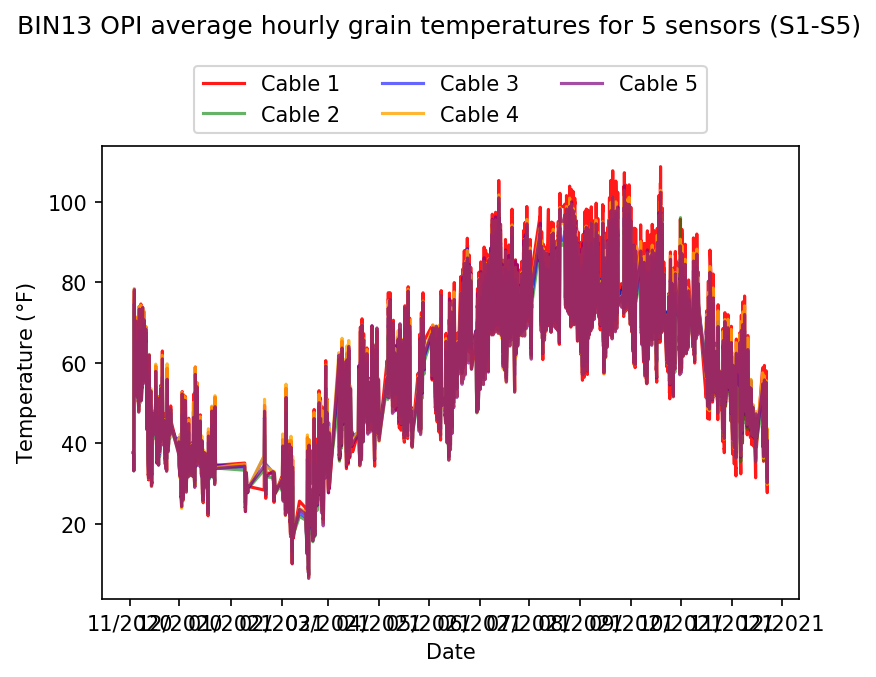

In [27]:
fig, ax = plt.subplots(dpi=150)
line1 = ax.plot(c1['OPI_DATE'].values, c1['C1s-avg'].values, color= 'red', label='Cable 1', alpha=0.9)
line2 = ax.plot(c2['OPI_DATE'].values, c2['C2s-avg'].values, color= 'green', label='Cable 2', alpha=0.6)
line3 = ax.plot(c3['OPI_DATE'].values, c3['C3s-avg'].values, color= 'blue', label='Cable 3', alpha=0.6)
line4 = ax.plot(c4['OPI_DATE'].values, c4['C4s-avg'].values, color= 'orange', label='Cable 4', alpha=0.8)
line5 = ax.plot(c5['OPI_DATE'].values, c5['C5s-avg'].values, color= 'purple', label='Cable 5', alpha=0.7)
#Date formatting 
# date_form = DateFormatter("%m/%d/%Y")
date_form = DateFormatter("%m/%Y")
#Specify axis to be date formatted
ax.xaxis.set_major_formatter(date_form)
months = MonthLocator()
ax.xaxis.set_major_locator(months)
#label x and y axis
ax.set_xlabel('Date')
ax.set_ylabel('Temperature ($\degree$F)');
#Add lines fro line labeling
lns = line1 + line2 + line3 + line4 + line5
labs = [l.get_label() for l in lns]
#Title box 
fig.suptitle('BIN13 OPI average hourly grain temperatures for 5 sensors (S1-S5)', y=1.1)
#Legend
ax.legend(lns, labs, bbox_to_anchor=(0.5, 1.2), loc="upper center", ncol=3);
filename = path / 'BIN13 OPI average hourly grain temperatures for 5 sensors.jpeg'
plt.savefig(filename, bbox_inches='tight')

In [26]:
# # Moving average daytime
# temp = c1_hour_df.rolling(12).mean()
# c1_mov_avg = c1_hour_df[['OPI_DATE']].copy()
# c1_mov_avg = pd.concat([c1_mov_avg, temp], axis=1)
# c1_mov_avg = c1_mov_avg.dropna()
# c1_mov_avg

In [27]:
# # Moving average daytime c2
# temp = c2_hour_df.rolling(12).mean()
# c2_mov_avg = c2_hour_df[['OPI_DATE']].copy()
# c2_mov_avg = pd.concat([c2_mov_avg, temp], axis=1)
# c2_mov_avg = c2_mov_avg.dropna()
# c2_mov_avg

In [149]:
def get_daily_avg(original_df, time_column, value_column):
    output = []
    current_day = pd.Timestamp(original_df[time_column].values.min())
    current_day = datetime(year=current_day.year, month=current_day.month, day=current_day.day)
    end_date = pd.Timestamp(original_df[time_column].values.max())
    while current_day < end_date:
        
        day_df = original_df[(original_df[time_column] > current_day) & 
       (original_df[time_column] < current_day + timedelta(days=1))]
        output.append({
            time_column: current_day,
            value_column: day_df[value_column].mean()
        })
        current_day = current_day + timedelta(days=1)
    return pd.DataFrame(output, columns=[time_column, value_column])

In [150]:
'''
This function will take a dataframe and find daily average
There are 3 inputs
dataframe
timestamp column's name
value column's name
'''
c1_daily_avg = get_daily_avg(c1, 'OPI_DATE', 'C1s-avg')
c1_daily_avg['C1-daily'] = c1_daily_avg['C1s-avg'].copy()
c1_daily_avg = c1_daily_avg.drop(['C1s-avg'], axis=1)
c1_daily_avg = c1_daily_avg.dropna()
c1_daily_avg

,OPI_DATE,C1-daily
0,2020-11-03,50.722222
1,2020-11-04,51.439583
2,2020-11-05,52.581250
3,2020-11-06,53.911458
4,2020-11-07,57.321739
...,...,...
377,2021-11-15,47.515000
381,2021-11-19,44.767308
382,2021-11-20,37.493750
383,2021-11-21,37.571875


In [151]:
'''
This function will take a dataframe and find daily average
There are 3 inputs
dataframe
timestamp column's name
value column's name
'''
c2_daily_avg = get_daily_avg(c2, 'OPI_DATE', 'C2s-avg')
c2_daily_avg['C2-daily'] = c2_daily_avg['C2s-avg'].copy()
c2_daily_avg = c2_daily_avg.drop(['C2s-avg'], axis=1)
c2_daily_avg = c2_daily_avg.dropna()
c2_daily_avg

,OPI_DATE,C2-daily
0,2020-11-03,52.512698
1,2020-11-04,52.371014
2,2020-11-05,54.079861
3,2020-11-06,55.529667
4,2020-11-07,56.425683
...,...,...
377,2021-11-15,42.805000
381,2021-11-19,41.732222
382,2021-11-20,36.368056
383,2021-11-21,36.866667


In [152]:
'''
This function will take a dataframe and find daily average
There are 3 inputs
dataframe
timestamp column's name
value column's name
'''
c3_daily_avg = get_daily_avg(c3, 'OPI_DATE', 'C3s-avg')
c3_daily_avg['C3-daily'] = c3_daily_avg['C3s-avg'].copy()
c3_daily_avg = c3_daily_avg.drop(['C3s-avg'], axis=1)
c3_daily_avg = c3_daily_avg.dropna()
c3_daily_avg

,OPI_DATE,C3-daily
0,2020-11-03,53.080952
1,2020-11-04,57.542029
2,2020-11-05,57.962153
3,2020-11-06,57.892333
4,2020-11-07,56.422404
...,...,...
377,2021-11-15,37.200000
381,2021-11-19,39.837778
382,2021-11-20,36.854167
383,2021-11-21,40.151389


In [153]:
'''
This function will take a dataframe and find daily average
There are 3 inputs
dataframe
timestamp column's name
value column's name
'''
c4_daily_avg = get_daily_avg(c4, 'OPI_DATE', 'C4s-avg')
c4_daily_avg['C4-daily'] = c4_daily_avg['C4s-avg'].copy()
c4_daily_avg = c4_daily_avg.drop(['C4s-avg'], axis=1)
c4_daily_avg = c4_daily_avg.dropna()
c4_daily_avg

,OPI_DATE,C4-daily
0,2020-11-03,54.819048
1,2020-11-04,61.995652
2,2020-11-05,61.162847
3,2020-11-06,61.225000
4,2020-11-07,57.146448
...,...,...
377,2021-11-15,38.596667
381,2021-11-19,45.771111
382,2021-11-20,39.298611
383,2021-11-21,43.165278


In [154]:
'''
This function will take a dataframe and find daily average
There are 3 inputs
dataframe
timestamp column's name
value column's name
'''
c5_daily_avg = get_daily_avg(c5, 'OPI_DATE', 'C5s-avg')
c5_daily_avg['C5-daily'] = c5_daily_avg['C5s-avg'].copy()
c5_daily_avg = c5_daily_avg.drop(['C5s-avg'], axis=1)
c5_daily_avg = c5_daily_avg.dropna()
c5_daily_avg

,OPI_DATE,C5-daily
0,2020-11-03,52.777778
1,2020-11-04,52.635507
2,2020-11-05,55.293056
3,2020-11-06,56.735333
4,2020-11-07,56.418033
...,...,...
335,2021-10-04,66.420370
336,2021-10-05,67.486667
339,2021-10-08,71.194444
340,2021-10-09,72.460000


In [155]:
# create dataframe to save
# create new df
#Daily average from first 3 sensors
to_be_save_df = c1_daily_avg[['OPI_DATE']].copy()
# add new coloum
to_be_save_df['OPI_DATE'] = to_be_save_df['OPI_DATE'].apply(lambda x: datetime.strftime(x, '%m/%d/%Y'))
to_be_save_df['C1_Daily_Average'] = c1_daily_avg[['C1-daily']].copy()
to_be_save_df['C2_Daily_Average'] = c2_daily_avg[['C2-daily']].copy()
to_be_save_df['C3_Daily_Average'] = c3_daily_avg[['C3-daily']].copy()
to_be_save_df['C4_Daily_Average'] = c4_daily_avg[['C4-daily']].copy()
to_be_save_df['C5_Daily_Average'] = c5_daily_avg[['C5-daily']].copy()
to_be_save_df
# saving the daily average from first 5 sensors 
to_be_save_df.to_csv(path / 'BIN14 OPI average daily grain temperatures for 6-9sensors.csv')

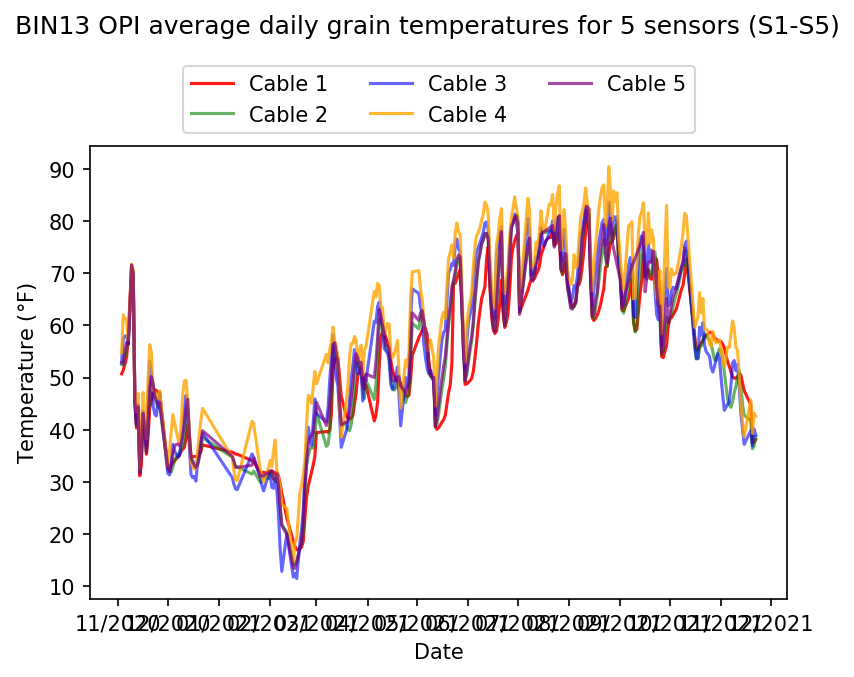

In [156]:
fig, ax = plt.subplots(dpi=150)
line1 = ax.plot(c1_daily_avg['OPI_DATE'].values, c1_daily_avg['C1-daily'].values, 'red', label='Cable 1', alpha=0.9)
line2 = ax.plot(c2_daily_avg['OPI_DATE'].values, c2_daily_avg['C2-daily'].values, 'green', label='Cable 2', alpha=0.6)
line3 =ax.plot(c3_daily_avg['OPI_DATE'].values, c3_daily_avg['C3-daily'].values,'blue', label='Cable 3', alpha=0.6)
line4 =ax.plot(c4_daily_avg['OPI_DATE'].values, c4_daily_avg['C4-daily'].values,'orange', label='Cable 4', alpha=0.8)
line5 =ax.plot(c5_daily_avg['OPI_DATE'].values, c5_daily_avg['C5-daily'].values,'purple', label='Cable 5', alpha=0.7)

#Date formatting 
# date_form = DateFormatter("%m/%d/%Y")
date_form = DateFormatter("%m/%Y")
#Specify axis to be date formatted
ax.xaxis.set_major_formatter(date_form)
months = MonthLocator()
ax.xaxis.set_major_locator(months)
#label x and y axis
ax.set_xlabel('Date')
ax.set_ylabel('Temperature ($\degree$F)');
#Add lines fro line labeling
lns = line1 + line2 + line3 + line4 + line5
labs = [l.get_label() for l in lns]
#Title box 
fig.suptitle('BIN13 OPI average daily grain temperatures for 5 sensors (S1-S5)', y=1.1)
#Legend
ax.legend(lns, labs, bbox_to_anchor=(0.5, 1.2), loc="upper center", ncol=3);
filename = path / 'BIN13 OPI average daily grain temperatures for 5 sensors.jpeg'
plt.savefig(filename, bbox_inches='tight')

In [157]:
#THIS IS FOR AVG GRAIN RH
# average of first 3 sensors
RH1 = clean_df[['OPI_DATE', 'RH1s-avg']].copy()
RH1 = RH1.dropna()
RH1

,OPI_DATE,RH1s-avg
126,2020-11-03 00:51:00,51.350
127,2020-11-03 01:51:00,53.025
128,2020-11-03 02:51:00,56.250
129,2020-11-03 03:51:00,60.525
130,2020-11-03 04:51:00,64.675
...,...,...
8389,2021-11-22 06:55:00,67.275
8390,2021-11-22 07:55:00,67.275
8391,2021-11-22 08:55:00,67.300
8392,2021-11-22 09:55:00,67.475


In [158]:
current_time = RH1.loc[RH1.index[0]]['OPI_DATE']
for index, row in RH1.iterrows():
#   timestamp = datetime.datetime.strptime(row.OPI_DATE, '%m/%d/%Y %I:%M:%S %p')
    timestamp = row['OPI_DATE']
    if (timestamp - current_time) > timedelta(minutes=59) or index == RH1.index[0]:
        current_time = timestamp
    else:
        RH1 = RH1.drop(index)

In [159]:
temp = RH1.copy()
temp
temp.index[0]
RH1.loc[temp.index[0]]['OPI_DATE']

Timestamp('2020-11-03 00:51:00')

In [67]:
# average of first 3 sensors
RH2 = clean_df[['OPI_DATE', 'RH2s-avg']].copy()
RH2 = RH2.dropna()
RH2

KeyError: "['RH2s-avg'] not in index"

In [ ]:
# average of first 3 sensors
RH3 = clean_df[['OPI_DATE', 'RH3s-avg']].copy()
RH3 = RH3.dropna()
RH3

,OPI_DATE,RH3s-avg


In [39]:
# average of first 3 sensors
RH4 = clean_df[['OPI_DATE', 'RH4s-avg']].copy()
RH4 = RH4.dropna()
RH4

,OPI_DATE,RH4s-avg


In [40]:
# average of first 3 sensors
RH5 = clean_df[['OPI_DATE', 'RH5s-avg']].copy()
RH5 = RH5.dropna()
RH5

,OPI_DATE,RH5s-avg


In [160]:
# create dataframe to save
# create new df
to_be_save_df = RH1[['OPI_DATE']].copy()
# add new column
to_be_save_df['OPI_DATE'] = to_be_save_df['OPI_DATE'].apply(lambda x: datetime.strftime(x, '%m/%d/%Y %I:%M %p'))
to_be_save_df['RH1_Avg_5_sensors'] = RH1[['RH1s-avg']].copy()
#to_be_save_df['RH2_Avg_3_sensors'] = RH2[['RH2s-avg']].copy()
#to_be_save_df['RH3_Avg_3_sensors'] = RH3[['RH3s-avg']].copy()
#to_be_save_df['RH4_Avg_3_sensors'] = RH4[['RH4s-avg']].copy()
#to_be_save_df['RH5_Avg_3_sensors'] = RH5[['RH5s-avg']].copy()
to_be_save_df
# saving the 5 avg sensors (hourly)
to_be_save_df.to_csv(path / 'Avg_hourly_grain_RH_6-9sensors_b14.csv')
to_be_save_df

,OPI_DATE,RH1_Avg_5_sensors
126,11/03/2020 12:51 AM,51.350
127,11/03/2020 01:51 AM,53.025
128,11/03/2020 02:51 AM,56.250
129,11/03/2020 03:51 AM,60.525
130,11/03/2020 04:51 AM,64.675
...,...,...
8389,11/22/2021 06:55 AM,67.275
8390,11/22/2021 07:55 AM,67.275
8391,11/22/2021 08:55 AM,67.300
8392,11/22/2021 09:55 AM,67.475


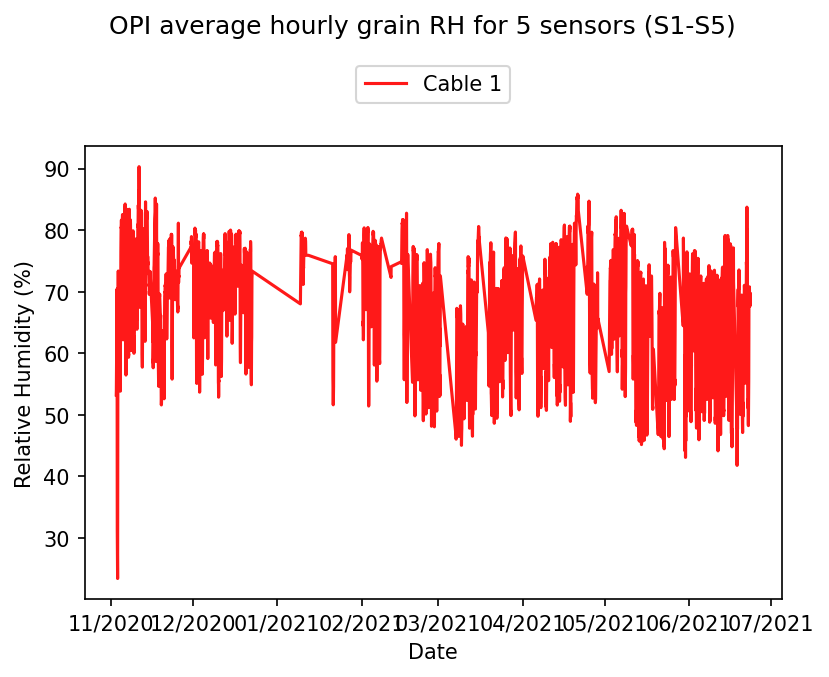

In [42]:
#Note we only have data for the center RH1 in the Bin
fig, ax = plt.subplots(dpi=150)
line1 = ax.plot(RH1['OPI_DATE'].values, RH1['RH1s-avg'].values, color= 'red', label='Cable 1', alpha=0.9)
# line2 = ax.plot(RH2['OPI_DATE'].values, RH2['RH2s-avg'].values, color= 'green', label='Cable 2', alpha=0.6)
# line3 = ax.plot(RH3['OPI_DATE'].values, RH3['RH3s-avg'].values, color= 'blue', label='Cable 3', alpha=0.6)
# line4 = ax.plot(RH4['OPI_DATE'].values, RH4['RH4s-avg'].values, color= 'orange', label='Cable 4', alpha=0.8)
# line5 = ax.plot(RH5['OPI_DATE'].values, RH5['RH5s-avg'].values, color= 'purple', label='Cable 5', alpha=0.7)
#Date formatting 
# date_form = DateFormatter("%m/%d/%Y")
date_form = DateFormatter("%m/%Y")
#Specify axis to be date formatted
ax.xaxis.set_major_formatter(date_form)
months = MonthLocator()
ax.xaxis.set_major_locator(months)
#label x and y axis
ax.set_xlabel('Date')
ax.set_ylabel('Relative Humidity (%)');
#Add lines fro line labeling
lns = line1 
labs = [l.get_label() for l in lns]
#Title box 
fig.suptitle('OPI average hourly grain RH for 5 sensors (S1-S5)', y=1.1)
#Legend
ax.legend(lns, labs, bbox_to_anchor=(0.5, 1.2), loc="upper center", ncol=3);
filename = path / 'BIN13 OPI average hourly grain RH for 5 sensors.jpeg'
plt.savefig(filename, bbox_inches='tight')

In [161]:
#This is for avg daily RH 
#note that it is only one cable that works i.e RH1 hence other cables are 'commented'
'''
This function will take a dataframe and find daily average
There are 3 inputs
dataframe
timestamp column's name
value column's name
'''
RH1_daily_avg = get_daily_avg(RH1, 'OPI_DATE', 'RH1s-avg')
RH1_daily_avg['RH1-daily'] = RH1_daily_avg['RH1s-avg'].copy()
RH1_daily_avg = RH1_daily_avg.drop(['RH1s-avg'], axis=1)
RH1_daily_avg = RH1_daily_avg.dropna()
RH1_daily_avg

,OPI_DATE,RH1-daily
0,2020-11-03,62.868056
1,2020-11-04,73.189583
2,2020-11-05,73.952083
3,2020-11-06,74.189583
4,2020-11-07,70.932609
...,...,...
377,2021-11-15,69.081250
381,2021-11-19,66.848077
382,2021-11-20,66.095833
383,2021-11-21,66.607292


In [76]:
'''
This function will take a dataframe and find daily average
There are 3 inputs
dataframe
timestamp column's name
value column's name
'''
RH2
# RH2_daily_avg = get_daily_avg(RH2, 'OPI_DATE', 'RH2s-avg')
# RH2_daily_avg['RH2-daily'] = RH2_daily_avg['RH2s-avg'].copy()
# RH2_daily_avg = RH2_daily_avg.drop(['RH2s-avg'], axis=1)
# RH2_daily_avg = RH2_daily_avg.dropna()
# RH2_daily_avg

NameError: name 'RH2' is not defined

In [45]:
'''
This function will take a dataframe and find daily average
There are 3 inputs
dataframe
timestamp column's name
value column's name
'''
RH3
# RH3_daily_avg = get_daily_avg(RH3, 'OPI_DATE', 'RH3s-avg')
# RH3_daily_avg['RH3-daily'] = RH3_daily_avg['RH3s-avg'].copy()
# RH3_daily_avg = RH3_daily_avg.drop(['RH3s-avg'], axis=1)
# RH3_daily_avg = RH3_daily_avg.dropna()
# RH3_daily_avg

,OPI_DATE,RH3s-avg


In [46]:
'''
This function will take a dataframe and find daily average
There are 3 inputs
dataframe
timestamp column's name
value column's name
'''
# RH4_daily_avg = get_daily_avg(RH2, 'OPI_DATE', 'RH4s-avg')
# RH4_daily_avg['RH4-daily'] = RH4_daily_avg['RH4s-avg'].copy()
# RH4_daily_avg = RH4_daily_avg.drop(['RH4s-avg'], axis=1)
# RH4_daily_avg = RH4_daily_avg.dropna()
# RH4_daily_avg

"\nThis function will take a dataframe and find daily average\nThere are 3 inputs\ndataframe\ntimestamp column's name\nvalue column's name\n"

In [47]:
'''
This function will take a dataframe and find daily average
There are 3 inputs
dataframe
timestamp column's name
value column's name
'''
# RH5_daily_avg = get_daily_avg(RH5, 'OPI_DATE', 'RH5s-avg')
# RH5_daily_avg['RH5-daily'] = RH5_daily_avg['RH5s-avg'].copy()
# RH5_daily_avg = RH5_daily_avg.drop(['RH5s-avg'], axis=1)
# RH5_daily_avg = RH5_daily_avg.dropna()
# RH5_daily_avg

"\nThis function will take a dataframe and find daily average\nThere are 3 inputs\ndataframe\ntimestamp column's name\nvalue column's name\n"

In [162]:
# create dataframe to save
# create new df
#Daily average from first 3 sensors
to_be_save_df = RH1_daily_avg[['OPI_DATE']].copy()
# add new coloum
to_be_save_df['OPI_DATE'] = to_be_save_df['OPI_DATE'].apply(lambda x: datetime.strftime(x, '%m/%d/%Y'))
to_be_save_df['RH1_Daily_Average'] = RH1_daily_avg[['RH1-daily']].copy()
# to_be_save_df['RH2_Daily_Average'] = RH2_daily_avg[['RH2-daily']].copy()
# to_be_save_df['RH3_Daily_Average'] = RH3_daily_avg[['RH3-daily']].copy()
# to_be_save_df['RH4_Daily_Average'] = RH4_daily_avg[['RH4-daily']].copy()
# to_be_save_df['RH5_Daily_Average'] = RH5_daily_avg[['RH5-daily']].copy()
to_be_save_df
# saving the daily average from first 3 sensors 
to_be_save_df.to_csv(path / 'BIN14 OPI daily time daily avg6-9 grain RH.csv')

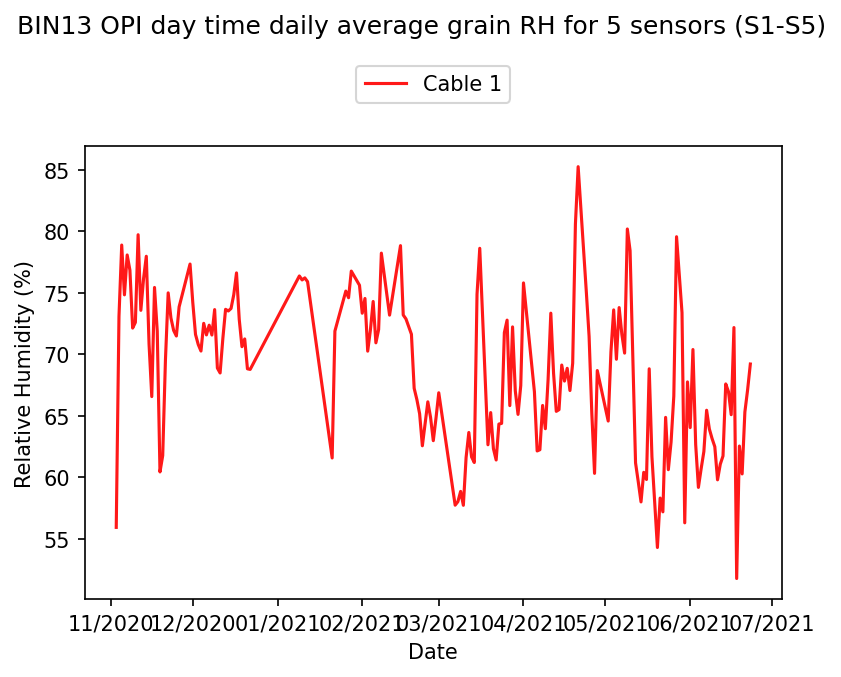

In [49]:
fig, ax = plt.subplots(dpi=150)
line1 = ax.plot(RH1_daily_avg['OPI_DATE'].values, RH1_daily_avg['RH1-daily'].values, 'red', label='Cable 1', alpha=0.9)
# line2 = ax.plot(RH2_daily_avg['OPI_DATE'].values, RH2_daily_avg['RH2-daily'].values, 'green', label='Cable 2', alpha=0.6)
# line3 =ax.plot(RH3_daily_avg['OPI_DATE'].values, RH3_daily_avg['RH3-daily'].values,'blue', label='Cable 3', alpha=0.6)
# line4 =ax.plot(RH4_daily_avg['OPI_DATE'].values, RH4_daily_avg['RH4-daily'].values,'orange', label='Cable 4', alpha=0.8)
# line5 =ax.plot(RH5_daily_avg['OPI_DATE'].values, RH5_daily_avg['RH5-daily'].values,'purple', label='Cable 5', alpha=0.7)
#Date formatting 
# date_form = DateFormatter("%m/%d/%Y")
date_form = DateFormatter("%m/%Y")
#Specify axis to be date formatted
ax.xaxis.set_major_formatter(date_form)
months = MonthLocator()
ax.xaxis.set_major_locator(months)
#label x and y axis
ax.set_xlabel('Date')
ax.set_ylabel('Relative Humidity (%)');
#Add lines fro line labeling
lns = line1 #+ line2 + line3 + line4 + line5
labs = [l.get_label() for l in lns]
#Title box 
fig.suptitle('BIN13 OPI day time daily average grain RH for 5 sensors (S1-S5)', y=1.1)
#Legend
ax.legend(lns, labs, bbox_to_anchor=(0.5, 1.2), loc="upper center", ncol=3);
filename = path / 'BIN13 OPI daily average grain RH for 5 sensors.jpeg'
plt.savefig(filename, bbox_inches='tight')

In [163]:
#THIS IS FOR AVG GRAIN MC
# average of first 3 sensors
#NOTE only cable 1 is working (MC1) hence we 'comment' on the others
MC1 = clean_df[['OPI_DATE', 'MC1s-avg']].copy()
MC1 = MC1.dropna()
MC1

,OPI_DATE,MC1s-avg
143,2020-11-03 17:51:00,15.6450
144,2020-11-03 18:23:00,15.6500
145,2020-11-03 18:40:00,15.6500
146,2020-11-03 18:42:00,15.6500
147,2020-11-03 18:47:00,15.6525
...,...,...
8389,2021-11-22 06:55:00,14.5725
8390,2021-11-22 07:55:00,14.5700
8391,2021-11-22 08:55:00,14.5725
8392,2021-11-22 09:55:00,14.5975


In [51]:
# average of first 3 sensors
# MC2 = clean_df[['OPI_DATE', 'MC2s-avg']].copy()
# MC2 = MC2.dropna()
# MC2

In [52]:
# average of first 3 sensors
# MC3 = clean_df[['OPI_DATE', 'MC3s-avg']].copy()
# MC3 = MC3.dropna()
# MC3

In [53]:
# average of first 3 sensors
# MC4 = clean_df[['OPI_DATE', 'MC4s-avg']].copy()
# MC4 = MC4.dropna()
# MC4

In [54]:
# average of first 3 sensors
# MC5 = clean_df[['OPI_DATE', 'MC5s-avg']].copy()
# MC5 = MC5.dropna()
# MC5

In [166]:
current_time = MC1.loc[MC1.index[0]]['OPI_DATE']
for index, row in MC1.iterrows():
#   timestamp = datetime.datetime.strptime(row.OPI_DATE, '%m/%d/%Y %I:%M:%S %p')
    timestamp = row['OPI_DATE']
    if (timestamp - current_time) > timedelta(minutes=59) or index == MC1.index[0]:
        current_time = timestamp
    else:
        MC1 = MC1.drop(index)


In [167]:
MC1

,OPI_DATE,MC1s-avg
143,2020-11-03 17:51:00,15.6450
148,2020-11-04 12:32:00,15.0500
152,2020-11-04 13:32:00,15.0650
156,2020-11-04 14:32:00,15.0725
160,2020-11-04 15:32:00,15.0950
...,...,...
8389,2021-11-22 06:55:00,14.5725
8390,2021-11-22 07:55:00,14.5700
8391,2021-11-22 08:55:00,14.5725
8392,2021-11-22 09:55:00,14.5975


In [168]:
temp = MC1.copy()
temp
temp.index[0]
MC1.loc[temp.index[0]]['OPI_DATE']

Timestamp('2020-11-03 17:51:00')

In [169]:
# create dataframe to save
# create new df
to_be_save_df = MC1[['OPI_DATE']].copy()
# add new column
to_be_save_df['OPI_DATE'] = to_be_save_df['OPI_DATE'].apply(lambda x: datetime.strftime(x, '%m/%d/%Y %I:%M %p'))
to_be_save_df['MC1_Avg_5_sensors'] = MC1[['MC1s-avg']].copy()
# to_be_save_df['MC2_Avg_3_sensors'] = RH2[['MC2s-avg']].copy()
# to_be_save_df['MC3_Avg_3_sensors'] = RH3[['MC3s-avg']].copy()
# to_be_save_df['MC4_Avg_3_sensors'] = RH4[['MC4s-avg']].copy()
# to_be_save_df['MC5_Avg_3_sensors'] = RH5[['MC5s-avg']].copy()
to_be_save_df
# saving the 3 avg sensors (hourly)
to_be_save_df.to_csv(path / 'Avg_hourly_grain_MC_6-9sensors_b14.csv')
to_be_save_df

,OPI_DATE,MC1_Avg_5_sensors
143,11/03/2020 05:51 PM,15.6450
148,11/04/2020 12:32 PM,15.0500
152,11/04/2020 01:32 PM,15.0650
156,11/04/2020 02:32 PM,15.0725
160,11/04/2020 03:32 PM,15.0950
...,...,...
8389,11/22/2021 06:55 AM,14.5725
8390,11/22/2021 07:55 AM,14.5700
8391,11/22/2021 08:55 AM,14.5725
8392,11/22/2021 09:55 AM,14.5975


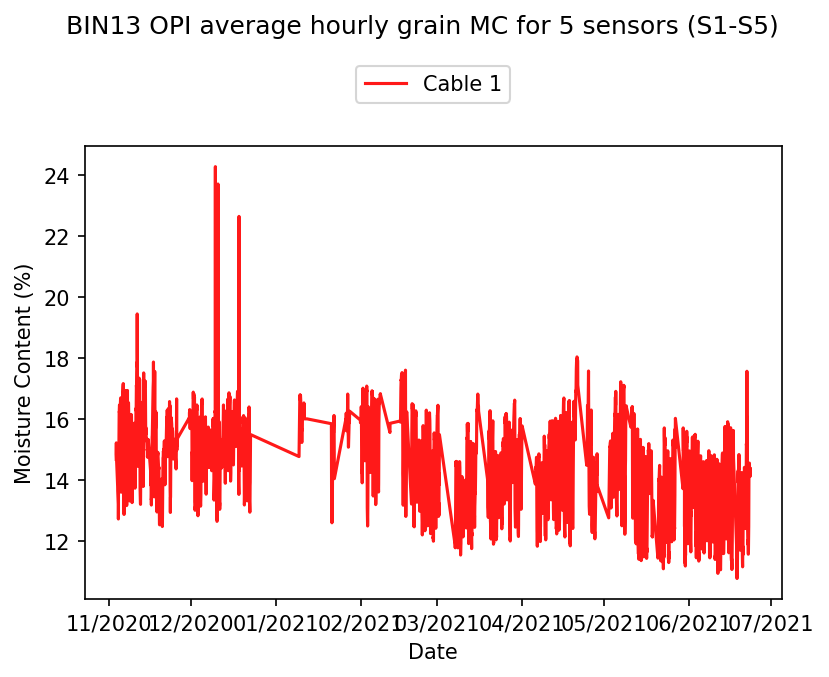

In [56]:
#Note we only have data for the center RH1 in the Bin
fig, ax = plt.subplots(dpi=150)
line1 = ax.plot(MC1['OPI_DATE'].values, MC1['MC1s-avg'].values, color= 'red', label='Cable 1', alpha=0.9)
# line2 = ax.plot(MC2['OPI_DATE'].values, MC2['MC2s-avg'].values, color= 'green', label='Cable 2', alpha=0.6)
# line3 = ax.plot(MC3['OPI_DATE'].values, MC3['MC3s-avg'].values, color= 'blue', label='Cable 3', alpha=0.6)
# line4 = ax.plot(MC4['OPI_DATE'].values, MC4['MC4s-avg'].values, color= 'orange', label='Cable 4', alpha=0.8)
# line5 = ax.plot(MC5['OPI_DATE'].values, MC5['MC5s-avg'].values, color= 'purple', label='Cable 5', alpha=0.7)
#Date formatting 
# date_form = DateFormatter("%m/%d/%Y")
date_form = DateFormatter("%m/%Y")
#Specify axis to be date formatted
ax.xaxis.set_major_formatter(date_form)
months = MonthLocator()
ax.xaxis.set_major_locator(months)
#label x and y axis
ax.set_xlabel('Date')
ax.set_ylabel('Moisture Content (%)');
#Add lines fro line labeling
lns = line1 
labs = [l.get_label() for l in lns]
#Title box 
fig.suptitle('BIN13 OPI average hourly grain MC for 5 sensors (S1-S5)', y=1.1)
#Legend
ax.legend(lns, labs, bbox_to_anchor=(0.5, 1.2), loc="upper center", ncol=3);
filename = path / 'BIN 13 OPI average hourly grain MC for 5 sensors.jpeg'
plt.savefig(filename, bbox_inches='tight')

In [170]:
#for daytime avg grain MC
#note only cable 1 works (MC1) hence we "comment" on others
'''
This function will take a dataframe and find daily average
There are 3 inputs
dataframe
timestamp column's name
value column's name
'''
MC1_daily_avg = get_daily_avg(MC1, 'OPI_DATE', 'MC1s-avg')
MC1_daily_avg['MC1-daily'] = MC1_daily_avg['MC1s-avg'].copy()
MC1_daily_avg = MC1_daily_avg.drop(['MC1s-avg'], axis=1)
MC1_daily_avg = MC1_daily_avg.dropna()
MC1_daily_avg

,OPI_DATE,MC1-daily
0,2020-11-03,15.645000
1,2020-11-04,15.104167
2,2020-11-05,15.195729
3,2020-11-06,15.210625
4,2020-11-07,14.695217
...,...,...
377,2021-11-15,14.603125
381,2021-11-19,14.393077
382,2021-11-20,14.430208
383,2021-11-21,14.494375


In [112]:
'''
This function will take a dataframe and find daily average
There are 3 inputs
dataframe
timestamp column's name
value column's name
'''
# MC2_daily_avg = get_daily_avg(MC2, 'OPI_DATE', 'MC2s-avg')
# MC2_daily_avg['MC2-daily'] = MC2_daily_avg['MC2s-avg'].copy()
# MC2_daily_avg = MC2_daily_avg.drop(['MC2s-avg'], axis=1)
# MC2_daily_avg = MC2_daily_avg.dropna()
# MC2_daily_avg

"\nThis function will take a dataframe and find daily average\nThere are 3 inputs\ndataframe\ntimestamp column's name\nvalue column's name\n"

In [59]:
'''
This function will take a dataframe and find daily average
There are 3 inputs
dataframe
timestamp column's name
value column's name
'''
# MC3_daily_avg = get_daily_avg(MC3, 'OPI_DATE', 'MC3s-avg')
# MC3_daily_avg['MC3-daily'] = MC3_daily_avg['MC3s-avg'].copy()
# MC3_daily_avg = MC3_daily_avg.drop(['MC3s-avg'], axis=1)
# MC3_daily_avg = MC3_daily_avg.dropna()
# MC3_daily_avg

"\nThis function will take a dataframe and find daily average\nThere are 3 inputs\ndataframe\ntimestamp column's name\nvalue column's name\n"

In [60]:
'''
This function will take a dataframe and find daily average
There are 3 inputs
dataframe
timestamp column's name
value column's name
'''
# MC4_daily_avg = get_daily_avg(MC4, 'OPI_DATE', 'MC4s-avg')
# MC4_daily_avg['MC4-daily'] = MC4_daily_avg['MC4s-avg'].copy()
# MC4_daily_avg = MC4_daily_avg.drop(['MC4s-avg'], axis=1)
# MC4_daily_avg = MC4_daily_avg.dropna()
# MC4_daily_avg

"\nThis function will take a dataframe and find daily average\nThere are 3 inputs\ndataframe\ntimestamp column's name\nvalue column's name\n"

In [61]:
'''
This function will take a dataframe and find daily average
There are 3 inputs
dataframe
timestamp column's name
value column's name
'''
# MC5_daily_avg = get_daily_avg(MC5, 'OPI_DATE', 'MC5s-avg')
# MC5_daily_avg['MC5-daily'] = MC5_daily_avg['MC5s-avg'].copy()
# MC5_daily_avg = MC5_daily_avg.drop(['MC5s-avg'], axis=1)
# MC5_daily_avg = MC5_daily_avg.dropna()
# MC5_daily_avg

"\nThis function will take a dataframe and find daily average\nThere are 3 inputs\ndataframe\ntimestamp column's name\nvalue column's name\n"

In [171]:
# create dataframe to save
# create new df
#Daily average from first 3 sensors
to_be_save_df = MC1_daily_avg[['OPI_DATE']].copy()
# add new coloum
to_be_save_df['OPI_DATE'] = to_be_save_df['OPI_DATE'].apply(lambda x: datetime.strftime(x, '%m/%d/%Y'))
to_be_save_df['MC1_Daily_Average'] = MC1_daily_avg[['MC1-daily']].copy()
# to_be_save_df['MC2_Daily_Average'] = MC2_daily_avg[['MC2-daily']].copy()
# to_be_save_df['MC3_Daily_Average'] = MC3_daily_avg[['MC3-daily']].copy()
# to_be_save_df['MC4_Daily_Average'] = MC4_daily_avg[['MC4-daily']].copy()
# to_be_save_df['MC5_Daily_Average'] = MC5_daily_avg[['MC5-daily']].copy()
to_be_save_df
# saving the daily average from first 5 sensors 
to_be_save_df.to_csv(path / 'BIN14 OPI daily avg6-9 grain MC.csv')

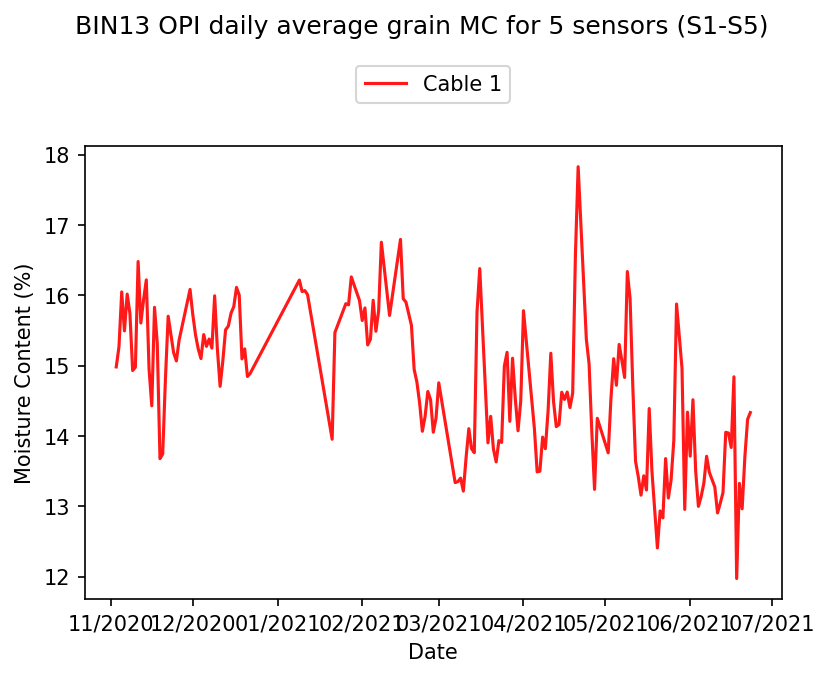

In [63]:
fig, ax = plt.subplots(dpi=150)
line1 = ax.plot(MC1_daily_avg['OPI_DATE'].values, MC1_daily_avg['MC1-daily'].values, 'red', label='Cable 1', alpha=0.9)
# line2 = ax.plot(MC2_daily_avg['OPI_DATE'].values, MC2_daily_avg['MC2-daily'].values, 'green', label='Cable 2', alpha=0.6)
# line3 =ax.plot(MC3_daily_avg['OPI_DATE'].values, MC3_daily_avg['MC3-daily'].values,'blue', label='Cable 3', alpha=0.6)
# line4 =ax.plot(MC4_daily_avg['OPI_DATE'].values, MC4_daily_avg['MC4-daily'].values,'orange', label='Cable 4', alpha=0.8)
# line5 =ax.plot(MC5_daily_avg['OPI_DATE'].values, MC5_daily_avg['MC5-daily'].values,'purple', label='Cable 5', alpha=0.7)
#Date formatting 
# date_form = DateFormatter("%m/%d/%Y")

date_form = DateFormatter("%m/%Y")
#Specify axis to be date formatted
ax.xaxis.set_major_formatter(date_form)
months = MonthLocator()
ax.xaxis.set_major_locator(months)
#label x and y axis
ax.set_xlabel('Date')
ax.set_ylabel('Moisture Content (%)');
#Add lines fro line labeling
lns = line1 #+ line2 + line3 + line4 + line5
labs = [l.get_label() for l in lns]
#Title box 
fig.suptitle('BIN13 OPI daily average grain MC for 5 sensors (S1-S5)', y=1.1)
#Legend
ax.legend(lns, labs, bbox_to_anchor=(0.5, 1.2), loc="upper center", ncol=3);
filename = path / 'BIN13 OPI daily average grain MC for 5 sensors.jpeg'
plt.savefig(filename, bbox_inches='tight')